# Анализ продаж компьютерных игр 2016

## Описание проекта

### Общие данные

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
  
По данным до 2016 года необходимо по состоянию на декабрь 2016 г. запланировать кампанию на 2017 год.  
  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Ознакомление с массивом данных

In [1]:
import pandas as pd #  Импортируем библиотеку для работы с базами данных 
import matplotlib.pyplot as plt #  Импортируем библиотеку для построения графической информации
import numpy as np 
import seaborn as sns
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.Genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
len(df[df['year_of_release'].isna()]) #  Определим количество пропусков в поле year_of_release

269

In [9]:
df = df.dropna(subset=['year_of_release']) #  Избавляемся от пропусков

In [10]:
df['year_of_release'] = df['year_of_release'].astype('int') #  Преобразуем значения в поле в цельночисленный формат

In [11]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
df['user_score'] = pd.to_numeric(df['user_score'], errors = 'coerce') #  Преобразуем данные в числа

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [14]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000,7463.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,68.994363,7.126330
std,5.877050,0.818416,0.506696,0.311082,0.187994,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [15]:
df['user_score'] = df['user_score'] * 10  #  Шкала оценок критиков и пользователей отличается, приведем к одной шкале

In [16]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000,7463.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,68.994363,71.263299
std,5.877050,0.818416,0.506696,0.311082,0.187994,13.920060,14.994467
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,64.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,75.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,82.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,97.000000


In [17]:
df.rating.value_counts() #  Аббревиатура tbd не встречается

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [18]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [19]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [20]:
df.sort_values(by = 'total_sales').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.0,0.00,0.0,NaN,NaN,NaN,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.0,0.00,0.0,NaN,NaN,NaN,0.00
16184,Higurashi no Naku Koro ni Iki,PS3,2015,Action,0.00,0.0,0.01,0.0,NaN,NaN,NaN,0.01
16183,Uta no * Prince-Sama: Sweet Serenade,PSP,2011,Adventure,0.00,0.0,0.01,0.0,NaN,NaN,NaN,0.01
16182,Rocksmith 2014 Edition Remastered,XOne,2016,Misc,0.01,0.0,0.00,0.0,NaN,NaN,T,0.01


### Вывод

В датасете представлена информация по продажам игр, начиная с 1980 года. Всего содержится 16715 записей. Имеются незаполненные поля. В частности есть пропуски в поле year_of_release, которые можно признать случайными. Учитывая их незначительное количество, они были удалены.

## Исследовательский анализ

### Исследование периодизации

In [21]:
df_year_log = df.groupby(['year_of_release']).agg({'total_sales':('count', 'sum')}).reset_index() #  Группируем данные
df_year_log.columns = ('year_of_release', 'count', 'total_sales')
df_year_log.describe()

,year_of_release,count,total_sales
count,37.000000,37.000000,37.000000
mean,1998.000000,444.486486,238.291622
std,10.824355,451.557159,207.535172
min,1980.000000,9.000000,11.380000
25%,1989.000000,36.000000,49.370000
50%,1998.000000,338.000000,201.070000
75%,2007.000000,762.000000,361.240000
max,2016.000000,1427.000000,671.500000


Определим наиболее популярные платформы за весь период

In [22]:
df_platform_log = df.groupby(['platform']).agg({'total_sales':'sum'}).reset_index()
df_platform_log.columns = ['platform', 'total_sales']
df_platform_log.sort_values(by = 'total_sales', ascending = False).reset_index().head(10)

,index,platform,total_sales
0,16,PS2,1233.56
1,28,X360,961.24
2,17,PS3,931.34
3,26,Wii,891.18
4,4,DS,802.78
5,15,PS,727.58
6,18,PS4,314.14
7,6,GBA,312.88
8,19,PSP,289.53
9,2,3DS,257.81


в ТОР-5 входят: PS2, X360, PS3, Wii, DS, PS

In [23]:
df_platform_log2 = df.query('platform == ("PS2", "X360", "PS3", "Wii", "DS", "PS")').groupby(['year_of_release', 'platform']).agg({'total_sales':'sum'}).reset_index()
df_platform_log2.columns = ['year_of_release', 'platform', 'total_sales']


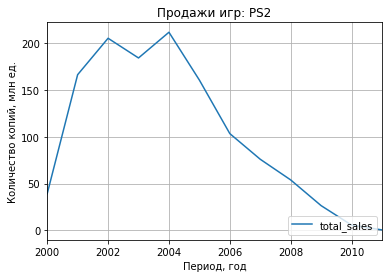

In [24]:
df_platform_log2.query('platform == "PS2"').plot(x = 'year_of_release', y = 'total_sales')
plt.title('Продажи игр: PS2')
plt.xlabel('Период, год')
plt.ylabel('Количество копий, млн ед.')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

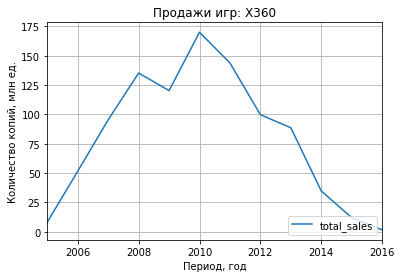

In [25]:
df_platform_log2.query('platform == "X360"').plot(x = 'year_of_release', y = 'total_sales')
plt.title('Продажи игр: X360')
plt.xlabel('Период, год')
plt.ylabel('Количество копий, млн ед.')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

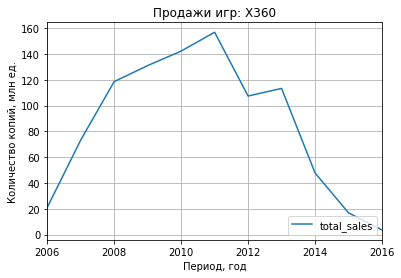

In [26]:
df_platform_log2.query('platform == "PS3"').plot(x = 'year_of_release', y = 'total_sales')
plt.title('Продажи игр: X360')
plt.xlabel('Период, год')
plt.ylabel('Количество копий, млн ед.')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

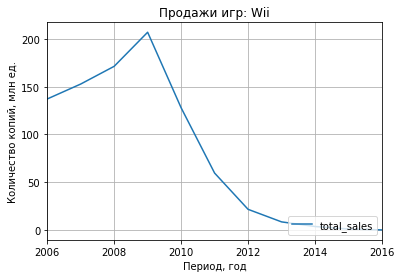

In [27]:
df_platform_log2.query('platform == "Wii"').plot(x = 'year_of_release', y = 'total_sales')
plt.title('Продажи игр: Wii')
plt.xlabel('Период, год')
plt.ylabel('Количество копий, млн ед.')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

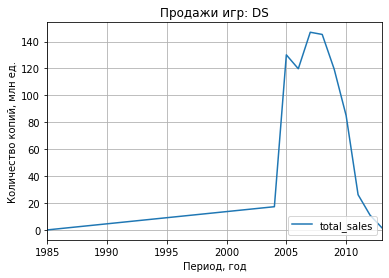

In [28]:
df_platform_log2.query('platform == "DS"').plot(x = 'year_of_release', y = 'total_sales')
plt.title('Продажи игр: DS')
plt.xlabel('Период, год')
plt.ylabel('Количество копий, млн ед.')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

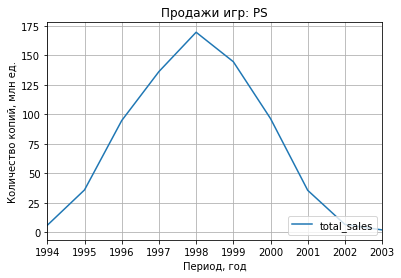

In [29]:
df_platform_log2.query('platform == "PS"').plot(x = 'year_of_release', y = 'total_sales')
plt.title('Продажи игр: PS')
plt.xlabel('Период, год')
plt.ylabel('Количество копий, млн ед.')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

Виды графиков показывают, что в среднем "время жизни" платформы составляет 5 лет

In [30]:
df_forecast = df.query('year_of_release > 2011') #  Подготавливаем пятилетний срез актуальных данных

In [31]:
df_forecast_platform = df_forecast.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
df_forecast_platform.columns = ['platform', 'year_of_release', 'total_sales']
df_forecast_platform.sort_values(by = 'total_sales', ascending = False).head(20)


,platform,year_of_release,total_sales
19,PS4,2015,118.90
13,PS3,2013,113.25
12,PS3,2012,107.36
18,PS4,2014,100.00
40,X360,2012,99.74
41,X360,2013,88.58
20,PS4,2016,69.25
47,XOne,2015,60.14
1,3DS,2013,56.57
46,XOne,2014,54.07


Рассмотрим для анализа платформы - PS3, WiiU, PS4, PSP

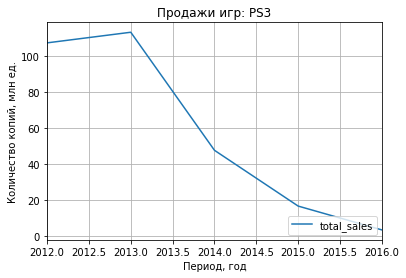

In [32]:
df_forecast_platform.query('platform == "PS3"').plot(x = 'year_of_release', y = 'total_sales')
plt.title('Продажи игр: PS3')
plt.xlabel('Период, год')
plt.ylabel('Количество копий, млн ед.')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

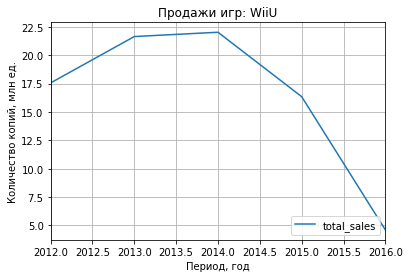

In [33]:
df_forecast_platform.query('platform == "WiiU"').plot(x = 'year_of_release', y = 'total_sales')
plt.title('Продажи игр: WiiU')
plt.xlabel('Период, год')
plt.ylabel('Количество копий, млн ед.')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

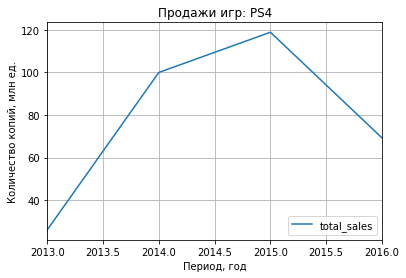

In [34]:
df_forecast_platform.query('platform == "PS4"').plot(x = 'year_of_release', y = 'total_sales')
plt.title('Продажи игр: PS4')
plt.xlabel('Период, год')
plt.ylabel('Количество копий, млн ед.')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

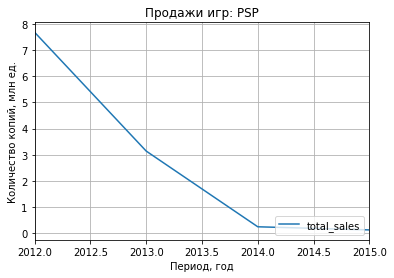

In [35]:
df_forecast_platform.query('platform == "PSP"').plot(x = 'year_of_release', y = 'total_sales')
plt.title('Продажи игр: PSP')
plt.xlabel('Период, год')
plt.ylabel('Количество копий, млн ед.')
plt.grid(True)
plt.legend(loc = 4)
plt.show()

В рассматриваемом периоде продажи идут на спад, вместе с тем по PS4 ожидается 1-2 года заметного спроса

### Исследование глобальных продаж

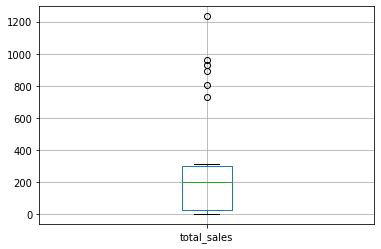

In [36]:
df.groupby(['platform']).agg({'total_sales':'sum'}).reset_index().boxplot()
plt.show()

В целом продажи по платформам составляют 200 млн копий, при этом в прошлом имели место отдельные вспышки интереса, когда продажи достигали более 800 млн копий  

### Влияние отзывов критиков и пользователей

In [37]:
df_critic_log =  df.groupby(['platform']).agg({'critic_score' :'median'}).reset_index()
df_user_log =  df.groupby(['platform']).agg({'user_score' :'median'}).reset_index()
df_rating_log = df_platform_log.merge(
    df_critic_log,
    on = 'platform',
    how = 'outer'
    ).merge(
    df_user_log,
    on = 'platform',
    how = 'outer'
)

df_rating_log = df_rating_log.dropna()

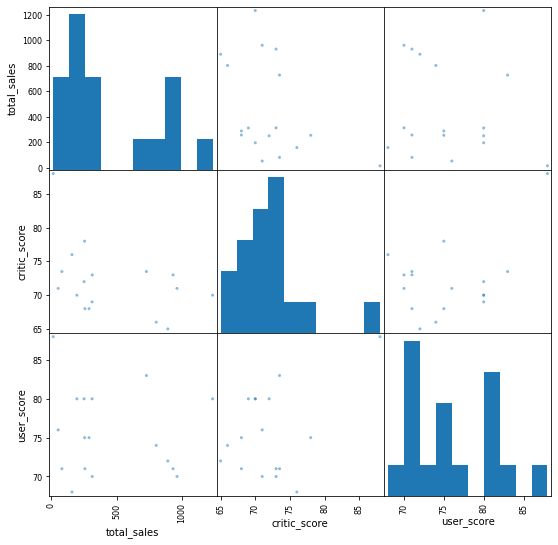

In [38]:
pd.plotting.scatter_matrix(df_rating_log, figsize = (9, 9))
plt.show()

In [39]:
df_rating_log.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,-0.422522,-0.122199
critic_score,-0.422522,1.000000,0.402718
user_score,-0.122199,0.402718,1.000000


Высокий рейтинг не способствует продажам

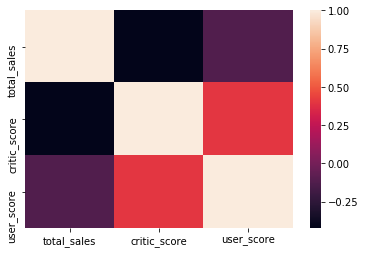

In [40]:
sns.heatmap(df_rating_log.corr())
plt.show()

### Анализ предпочтений по жанрам игр

In [41]:
df_genres_log = df.groupby(['genre']).agg({'total_sales':('count', 'mean','sum')}).reset_index()
df_genres_log.columns = ['genre', 'count', 'mean', 'total_sales']
df_genres_log.sort_values(by = 'total_sales', ascending = False)

,genre,count,mean,total_sales
0,Action,3307,0.519057,1716.52
10,Sports,2306,0.567940,1309.67
8,Shooter,1296,0.803519,1041.36
7,Role-Playing,1481,0.628683,931.08
4,Platform,878,0.940262,825.55
3,Misc,1721,0.459204,790.29
6,Racing,1226,0.590122,723.49
2,Fighting,837,0.528865,442.66
9,Simulation,857,0.452695,387.96
5,Puzzle,569,0.421599,239.89


Наиболее популярными жанрами являются Action и Sports, причем как по числу проданных копий, так и количеству выпущенных игр. Для жанров Shooter и Platform характерен выпуск знаковых релизов, пользующихся большой популярностью

## Портрет пользователя

### Предпочтения по выбору платформ

In [42]:
df_user_na_platform = df.groupby(['platform']).agg({'na_sales':'sum'})
df_user_na_platform.sort_values(by = 'na_sales', ascending = False).reset_index().head()

,platform,na_sales
0,X360,595.74
1,PS2,572.92
2,Wii,486.87
3,PS3,390.13
4,DS,380.31


In [43]:
df_user_eu_platform = df.groupby(['platform']).agg({'eu_sales':'sum'})
df_user_eu_platform.sort_values(by = 'eu_sales', ascending = False).reset_index().head()

,platform,eu_sales
0,PS2,332.63
1,PS3,327.21
2,X360,268.32
3,Wii,258.32
4,PS,212.39


In [44]:
df_user_jp_platform = df.groupby(['platform']).agg({'jp_sales':'sum'})
df_user_jp_platform.sort_values(by = 'jp_sales', ascending = False).reset_index().head()

,platform,jp_sales
0,DS,175.02
1,PS,139.78
2,PS2,137.54
3,SNES,116.55
4,3DS,100.62


На американском континенте лидирует X360 с незначительныим отрывом от PS2, в Европе PS2 и PS3 заметно более популярны, чем X360 и Wii. В Японии картина принципиально отличается - в лидерах портитивная консоль DS

### Предпочтения по жанрам

In [45]:
df_user_na_genre = df.groupby(['genre']).agg({'na_sales':'sum'})
df_user_na_genre.sort_values(by = 'na_sales', ascending = False).reset_index().head()

,genre,na_sales
0,Action,863.17
1,Sports,671.20
2,Shooter,584.83
3,Platform,444.44
4,Misc,399.57


In [46]:
df_user_eu_genre = df.groupby(['genre']).agg({'eu_sales':'sum'})
df_user_eu_genre.sort_values(by = 'eu_sales', ascending = False).reset_index().head()

,genre,eu_sales
0,Action,510.99
1,Sports,371.33
2,Shooter,314.52
3,Racing,234.49
4,Misc,210.60


In [47]:
df_user_jp_genre = df.groupby(['genre']).agg({'jp_sales':'sum'})
df_user_jp_genre.sort_values(by = 'jp_sales', ascending = False).reset_index().head()

,genre,jp_sales
0,Role-Playing,353.39
1,Action,160.14
2,Sports,134.93
3,Platform,130.71
4,Misc,107.02


Набор популярных жанров в США и Европе сходный, за исключением того, что в Европе также предпочитают Racing, а в Америке - Platform. Предпочтения по жанрам в Японии также значительно отличается - в лидерах Role-Playing

In [48]:
df_rating_na = df.groupby(['rating']).agg({'na_sales':'sum'})
df_rating_na.sort_values(by = 'na_sales', ascending = False).reset_index()

,rating,na_sales
0,E,1274.24
1,T,747.60
2,M,742.89
3,E10+,345.50
4,K-A,2.56
5,EC,1.53
6,AO,1.26
7,RP,0.00


In [49]:
df_rating_eu = df.groupby(['rating']).agg({'eu_sales':'sum'})
df_rating_eu.sort_values(by = 'eu_sales', ascending = False).reset_index()

,rating,eu_sales
0,E,703.87
1,M,480.00
2,T,421.79
3,E10+,183.35
4,AO,0.61
5,K-A,0.27
6,EC,0.11
7,RP,0.03


In [50]:
df_rating_jp = df.groupby(['rating']).agg({'jp_sales':'sum'})
df_rating_jp.sort_values(by = 'jp_sales', ascending = False).reset_index()

,rating,jp_sales
0,E,197.96
1,T,150.70
2,M,63.58
3,E10+,40.20
4,K-A,1.46
5,AO,0.00
6,EC,0.00
7,RP,0.00


Распределение продаж относительно выданного рейтинга не свидетельствует о наличии значительных отличий в предпочтениях

### Выводы

Пользовательские предпочтения имеют определенные особенности, которые следует учитывать при планировании продаж. Рынки Америк и и Европы в целом имеют много общего, а рынок Японии требует специального подхода

## Проверка гипотез

### Средние пользовательсткие рейтинги платформ  Xbox One и PC одинаковые

Формулируем нулевую гипотезу - пользовательсткие рейтинги платформ  Xbox One и PC одинаковые. Альтернативная гипотеза - средние пользовательсткие рейтинги платформ Xbox One и PC различается. В случае значительного отклонения от среднего значения нормального распределения нулевая гипотеза подлежит пересмотру на альтернативную

In [51]:
alpha = 0.05
df_XOne = df.query('platform == "XOne"').dropna()
df_PC = df.query('platform == "PC"').dropna()
result = st.ttest_ind(df_XOne['user_score'], df_PC['user_score'])
result.pvalue < alpha

True

При уровне значимости 0,05 средние рейтинги по выбранным платформам значительно различаются, этот факт дает основания отвергнуть нулевую гипотезу и перейти к рассмотрению альтернативной 

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Выдвигаем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports различаются

In [52]:
df_Action = df.query('genre == "Action"').dropna()
df_Sports = df.query('genre == "Sports"').dropna()
result = st.ttest_ind(df_Action['user_score'], df_Sports['user_score'])
result.pvalue

0.7959786214567646

Отклонения находятся в пределах нормального распределения, поэтому нет оснований отвергать нулевую гипотезу и рассматривать альтернативную

# Общий вывод

На основании предоставленных данных проанализированы продажи компьтерных игр на рынках США, Европы, Японии и других стран, начиная с 1980 года. В ходе анализа выявлено, что среди популярных платформ, выходящих на рынок наблюдается четкий 5-летний период роста и спада популярности. На конец 2016 года наиболее перспективной платформой, с точки зрения, потенциала продаж в ближайшие 1-2 года является PS4. Вместе с тем, в последние годы наблюдается общее снижение популярности игр, объемы продаж снижаются.

Предпочтения пользователей в разных странах имеют некоторые особенности, которые следует учитывать при планировании. А рынок Японии и вовсе требует отдельного подхода, как по жанрам, так и платформам.

Проведена проверка отдельных гипотез в отношении пользовательских рейтингов. В результате анализа гипотеза о равенстве пользовательского рейтинга платформ Xbox One и PC не подтвердилась, а гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports не различаются, осталасть не опровергнута  